# Minor Project

# Exploratory Data Analysis

Importing libraries and loading file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#loadings Dataset
ipl = pd.read_csv('IPL.csv')

Understanding data / Data Cleaning

In [2]:
#number of rows and columns in dataset
print(ipl.shape)

(636, 18)


In [3]:
#Columns in DataFrame
print(ipl.columns)

Index(['sno', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'Man_of_Match', 'venue', 'F_umpire', 'S_Umpire',
       'Unnamed: 17'],
      dtype='object')


In [4]:
#given datasets
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sno             636 non-null    int64  
 1   season          636 non-null    int64  
 2   city            629 non-null    object 
 3   date            636 non-null    object 
 4   team1           636 non-null    object 
 5   team2           636 non-null    object 
 6   toss_winner     636 non-null    object 
 7   toss_decision   636 non-null    object 
 8   result          636 non-null    object 
 9   dl_applied      636 non-null    object 
 10  winner          633 non-null    object 
 11  win_by_runs     636 non-null    int64  
 12  win_by_wickets  636 non-null    int64  
 13  Man_of_Match    633 non-null    object 
 14  venue           636 non-null    object 
 15  F_umpire        635 non-null    object 
 16  S_Umpire        635 non-null    object 
 17  Unnamed: 17     0 non-null      flo

In [5]:
#simple summary by using the describe() method.
ipl.describe()

,sno,season,win_by_runs,win_by_wickets,Unnamed: 17
count,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,13.682390,3.372642,NaN
std,183.741666,2.773026,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,146.000000,10.000000,NaN


In [6]:
# First five record of the dataset
ipl.head(5)

,sno,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,Man_of_Match,venue,F_umpire,S_Umpire,Unnamed: 17
0,1,2008,Bangalore,18/04/08,KKR,RCB,RCB,field,normal,N,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19/04/08,CSK,KXIP,CSK,bat,normal,N,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19/04/08,RR,DD,RR,bat,normal,N,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20/04/08,MI,RCB,MI,bat,normal,N,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20/04/08,DC,KKR,DC,bat,normal,N,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [15]:
#data cleaning.
ipl.isnull().any()

sno               False
season            False
city               True
date              False
team1             False
team2             False
toss_winner       False
toss_decision     False
result            False
dl_applied        False
winner             True
win_by_runs       False
win_by_wickets    False
Man_of_Match       True
venue             False
F_umpire           True
S_Umpire           True
Unnamed: 17        True
dtype: bool

In [7]:
ipl.isnull().sum()

sno                 0
season              0
city                7
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              3
win_by_runs         0
win_by_wickets      0
Man_of_Match        3
venue               0
F_umpire            1
S_Umpire            1
Unnamed: 17       636
dtype: int64

In [17]:
#top 5 cities won the matches
ipl['city'].value_counts()[:5]

Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: city, dtype: int64

In [8]:
#list of top five cities won the matches
list(ipl['city'].value_counts()[:5].keys())

['Mumbai', 'Bangalore', 'Kolkata', 'Delhi', 'Hyderabad']

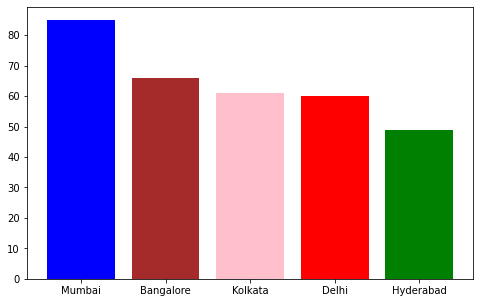

In [96]:
plt.figure(figsize=(8,5))
plt.bar(list(ipl['city'].value_counts()[:5].keys()),list(ipl['city'].value_counts()[:5]),color=["blue","brown","pink","red","green"])
plt.show()

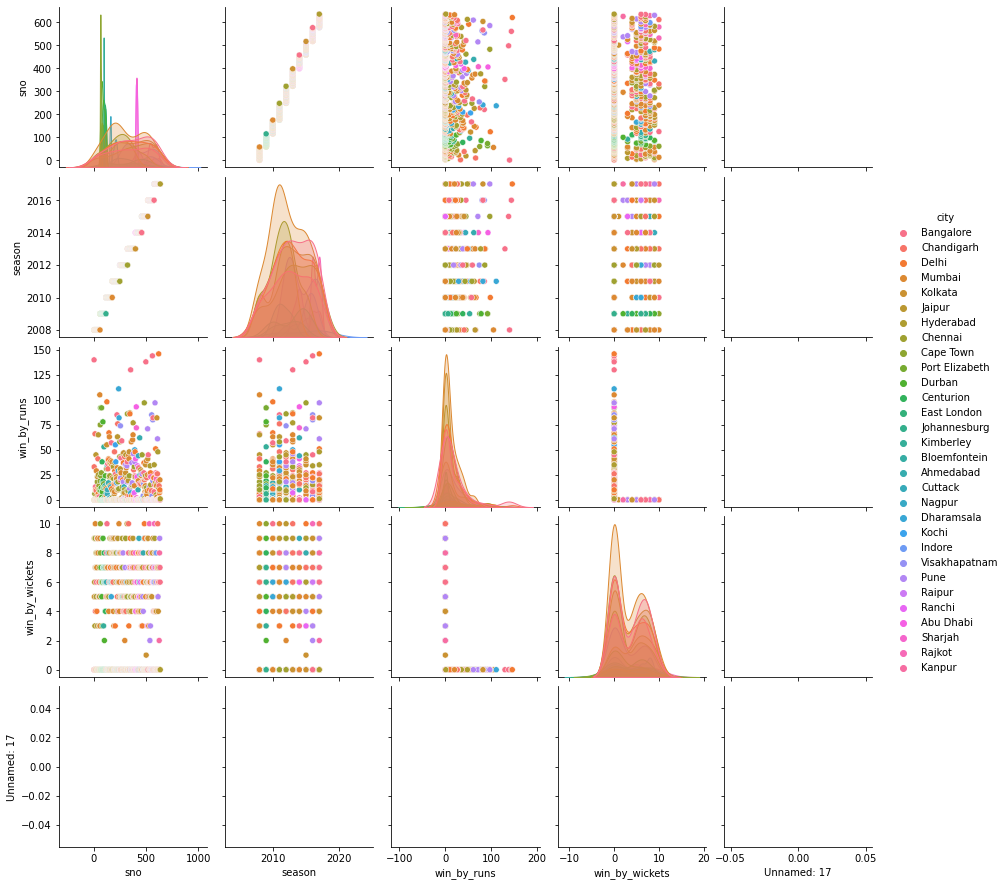

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style()
sns.pairplot(ipl, hue='city')


In [34]:
ipl['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [35]:
ipl['toss_winner'].value_counts()

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SH      35
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

In [10]:
batting_first = ipl[ipl['win_by_runs']!=0]
batting_first.head()

,sno,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,Man_of_Match,venue,F_umpire,S_Umpire,Unnamed: 17
0,1,2008,Bangalore,18/04/08,KKR,RCB,RCB,field,normal,N,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19/04/08,CSK,KXIP,CSK,bat,normal,N,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
7,8,2008,Chennai,23/04/08,CSK,MI,MI,field,normal,N,CSK,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
9,10,2008,Chandigarh,25/04/08,KXIP,MI,MI,field,normal,N,KXIP,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
14,15,2008,Bangalore,28/04/08,CSK,RCB,CSK,bat,normal,N,CSK,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN


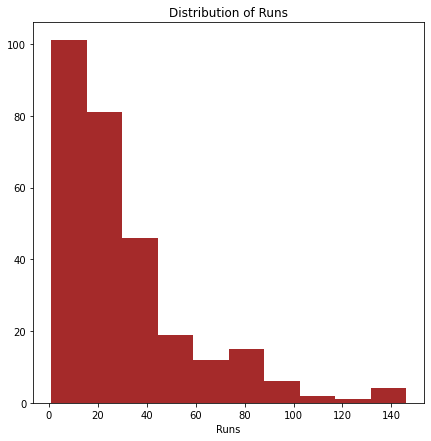

In [81]:
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'],color="brown")
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

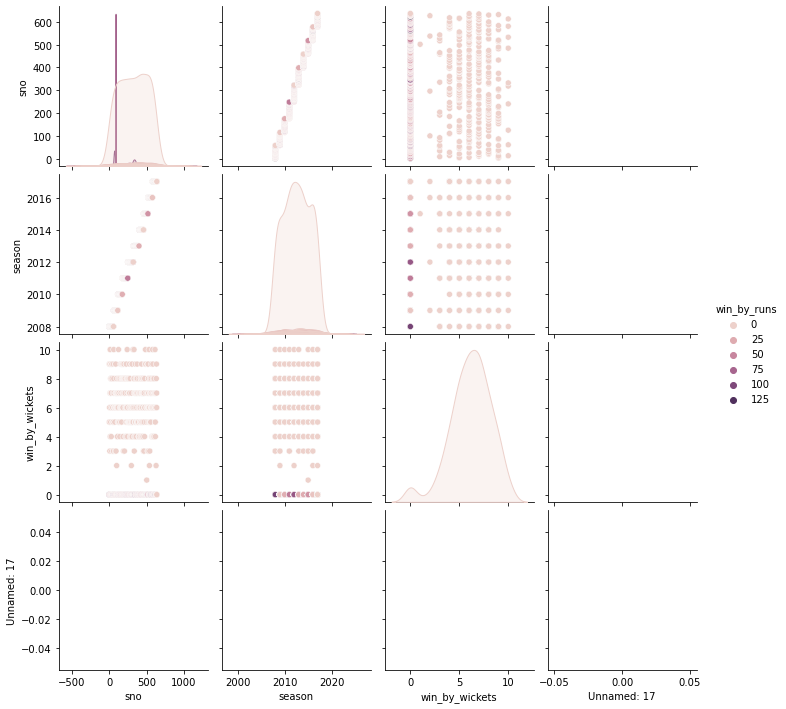

In [108]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style()
sns.pairplot(ipl, hue='win_by_runs')



In [47]:
batting_first['winner'].value_counts()

MI      47
CSK     46
KXIP    32
KKR     31
RCB     30
SH      23
RR      23
DD      21
DC      18
RPS      7
PW       6
KTK      2
GL       1
Name: winner, dtype: int64

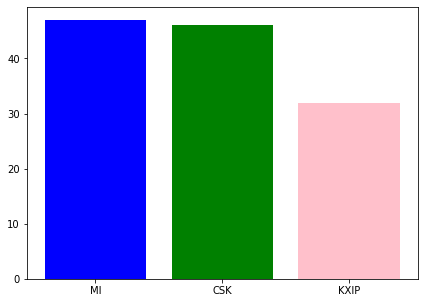

In [70]:
plt.figure(figsize=(7,5))
plt.bar(list(batting_first['winner'].value_counts()[:3].keys()),list(batting_first['winner'].value_counts()[:3]),color=["blue","green","pink"])
plt.show()

In [61]:
batting_second = ipl[ipl['win_by_wickets']!=0]
batting_second.head()

,sno,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,Man_of_Match,venue,F_umpire,S_Umpire,Unnamed: 17
2,3,2008,Delhi,19/04/08,RR,DD,RR,bat,normal,N,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20/04/08,MI,RCB,MI,bat,normal,N,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20/04/08,DC,KKR,DC,bat,normal,N,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,21/04/08,KXIP,RR,KXIP,bat,normal,N,RR,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,22/04/08,DC,DD,DC,bat,normal,N,DD,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN


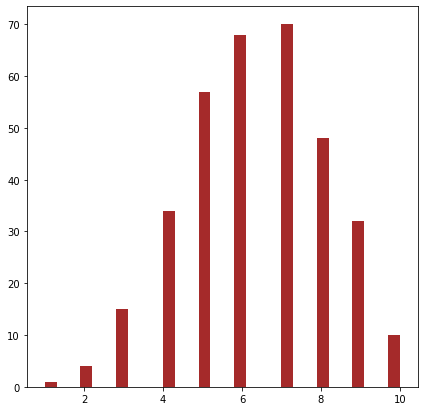

In [71]:
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30,color="brown")
plt.show()

In [64]:
batting_second['winner'].value_counts()

KKR     46
MI      44
RCB     42
DD      41
RR      38
KXIP    36
CSK     33
SH      18
GL      12
DC      11
RPS      8
PW       6
KTK      4
Name: winner, dtype: int64

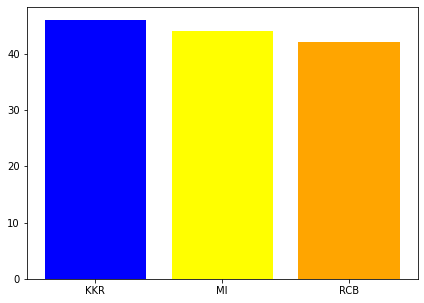

In [69]:
plt.figure(figsize=(7,5))
plt.bar(list(batting_second['winner'].value_counts()[:3].keys()),list(batting_second['winner'].value_counts()[:3]),color=["blue","yellow","orange"])
plt.show()

In [85]:
#number of matches played in each seasions
ipl['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

In [86]:
ipl['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cuttack            7
Ranchi             7
Port Elizabeth     7
Cape Town          7
Sharjah            6
Raipur             6
Kochi              5
Indore             5
Kanpur             4
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [92]:
#finding out the how many time a team won the matches after winning  the tosses
import numpy as np
np.sum(ipl['toss_winner']==ipl['winner'])



325

In [93]:
325/636

0.5110062893081762